In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# defining screen (cuts perpendicular through the DMD)
sy = np.linspace(-20, 20, 200)  # x-axis of screen
sz = np.linspace(-20, 20, 200)  # y-axis of screen
SY, SZ = np.meshgrid(sy, sz)
SX = 0  # screen is a plane specified x-value

# defining wave properties
wavelength = 1  # wavelength of monochromatic light
k = 2 * np.pi / wavelength  # absolute value of wave vector
theta_deg = 0
theta_rad = np.deg2rad(theta_deg)
phi_deg = 0
phi_rad = np.deg2rad(phi_deg)
wave_vector = k * \
    np.array([
        np.sin(theta_rad)*np.cos(phi_rad),
        np.sin(theta_rad)*np.sin(phi_rad),
        np.cos(theta_rad)])

# defining mirrors
nr_mirrors_x = 5  # number of mirrors in x-direction
nr_mirrors_y = 5  # number of mirrors in y-direction
mirror_size = 1  # edge length of square mirrors
mirror_gap = .1  # gap between mirror in x- and y-direction
tilt_angle_deg = 0  # tilt angle of mirror along diagonal in degree
tilt_angle_rad = np.deg2rad(tilt_angle_deg)  # tilt angle of mirror along diagonal in radiants

# defining sources
nr_sources_x = 10  # number of point sources per mirror in x-direction
nr_sources_y = 10  # number of point sources per mirror in y-direction

# defining mirrors
dmd_width = (mirror_size + mirror_gap) * nr_mirrors_x
dmd_height = (mirror_size + mirror_gap) * nr_mirrors_y

# define field which will be displayed on the screen
E_total_side = np.zeros_like(SY, dtype=complex)

# some constants for calculation
sin = np.sin(tilt_angle_rad)
cos = np.cos(tilt_angle_rad)
z = 0

# loop over all mirrors (nr_mirrors_x * nr_mirrors_y)
for mi in range(nr_mirrors_x):
    # current mirror x-position
    mirror_x = (mirror_size + mirror_gap) * mi - dmd_width/2
    for mj in range(nr_mirrors_y):
        # current mirror y-position
        mirror_y = (mirror_size + mirror_gap) * mj - dmd_height/2
        # loop over point sources
        for pi in range(nr_sources_x):
            # calculate x position on the local mirror coordinate system
            s = mirror_size/nr_sources_x * pi
            for pj in range(nr_sources_y):
                # calculate y position on the local mirror coordinate system
                t = mirror_size/nr_sources_y * pj
                # calculate rotated position on global coordinate system
                x = mirror_x + s * (0.5 * (1 - cos) + cos) + t * (0.5 * (1 - cos))
                y = mirror_y + s * (0.5 * (1 - cos)) + t * (0.5 * (1 - cos) + cos)
                z = 1 / np.sqrt(2) * (- s * sin + t * sin)
                # calculate distance of point source to every screen point
                r = np.sqrt((SX - x)**2 + (SY - y)**2 + (SZ - z)**2)
                # add field contribution to total field
                E_total_side += np.exp(1j * k * r) / r

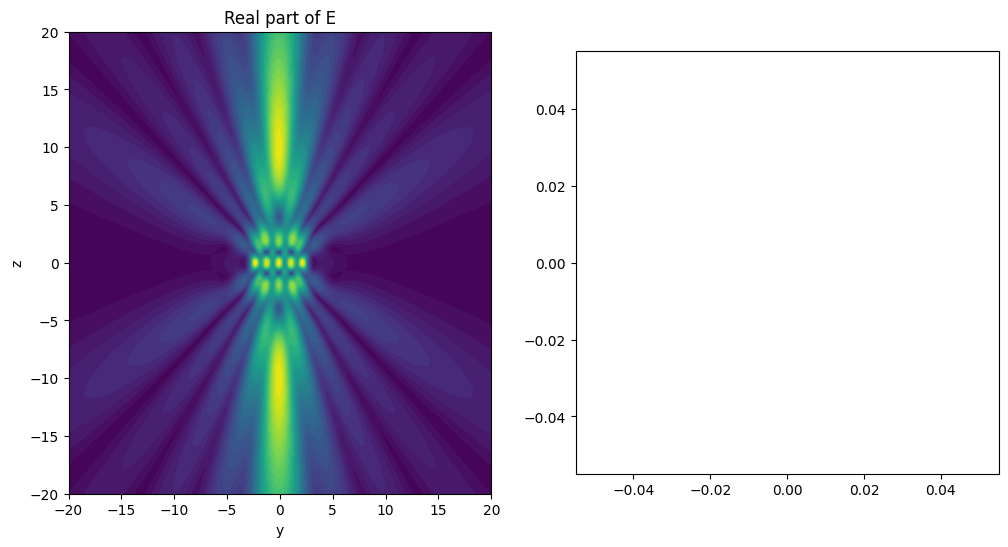

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(SY, SZ, (np.abs(E_total_side)), levels=50, cmap='viridis')
plt.title('Real part of E (cross section of dmd)')
plt.xlabel('y')
plt.ylabel('z')

plt.subplot(1, 2, 2)



plt.axis('square')
plt.show()